### Import Necessary libraries,  Wrangle data and Exploratory Data Analysis

In [1]:
import os
os.path.dirname(os.path.realpath("__file__"))


'C:\\Users\\Nkiru'

In [1]:
#import and read the dataset
import pandas as pd
data= pd.read_csv(r'C:\Users\Nkiru\Downloads\StudentsPerformance.csv' )
print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
#create a wrangle function to clean and tidy up our dataset if there is need!
import numpy as np
def wrangle(X):
    X = X.copy()
    X.columns = [col.replace(' ', '_') for col in X]    
    return X

In [3]:
df = wrangle(data)
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Check the data types
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
#Let us get the summary statistics
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#Get the summary statistics for object data types
data.describe(exclude = 'number')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [8]:
#Some of the columns names are too long and contain spaces, this is not a good practice
#lets modify some of the column names and copy to the wrangle function

df.columns = [col.replace(' ', '_') for col in df]

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
#Lets check for missing values
df.isnull().sum()  #There is no missing data

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Feature Engineering

In [12]:
#lets get the value counts for gender
df['gender'].value_counts(normalize = True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [152]:
#create a new feature that gets the total score of students
df['overall_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [43]:
#create a new binary feature for the students that showsnif a student pass above or within the class average/boundary/mark
df.loc[df['overall_score'] >= df['overall_score'].mean(), 'Remark'] = 1
df.loc[df['overall_score'] < df['overall_score'].mean(), 'Remark'] = 0

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1
1,female,group C,some college,standard,completed,69,90,88,247,1
2,female,group B,master's degree,standard,none,90,95,93,278,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0
4,male,group C,some college,standard,none,76,78,75,229,1


In [25]:
df['gender'].value_counts(normalize = True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [42]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

## Data Analysis
**To support our claims we have to apply some statitical theory**

In [115]:
#Establish:
#null hypothesis H0  : parents occupation do not affect students overall performance score
#Alternative hypothesis Ha: Parents occupation affects students overal performane score



## Data Visualization

Text(0.5, 1.0, 'Number of male and female students')

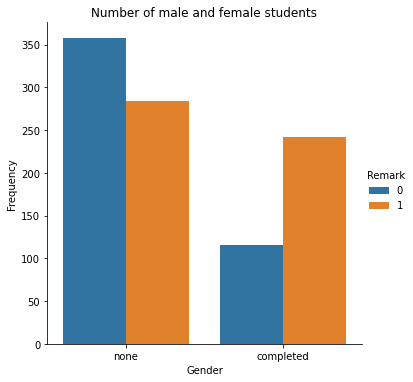

In [174]:
#Let us create a bar plot to visualize the distribution of male and female students
#plot using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'test_preparation_course', hue = 'Remark', data = df, kind='count')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Number of male and female students')

In [45]:
Remark_prop = pd.DataFrame(df['Remark'].value_counts(normalize=True))
Remark_perc = Remark_prop * 100
Remark_perc = Remark_perc.rename(index ={0: 'Fail', 1: 'Passed'})
Remark_perc

,Remark
Passed,52.6
Fail,47.4


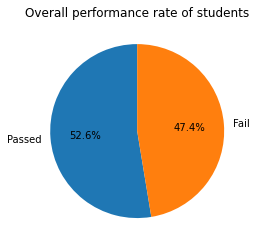

In [46]:
# Create a bar plot to show the number of students that pass above the class passmark of 50% in overall
#Create the pie chart


fig, ax = plt.subplots()

#Autopct causes the percents to be rounded.  Startangle causes the starting place
#on the pie chart to be vertical
ax.pie(Remark_perc['Remark'], labels = Remark_perc.index, autopct = '%1.1f%%', startangle=90)
ax.set_title('Overall performance rate of students')
###########

plt.show()

<AxesSubplot:xlabel='gender', ylabel='Remark'>

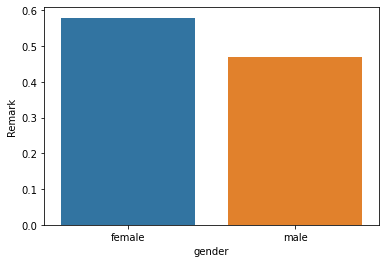

In [109]:
#find the relationship between gender and performance of students in all subjects
sns.barplot(x = 'gender', y = 'Remark', data = df, ci = None)

**It is seen that the percentage of female student is 52.6% while male is 47.4%**

In [ ]:
#let us visualize how the gender affects  responds to each of the assessment, math_score, reading_score and writing_score
sns.barplot(x = 'gender', y = 'math_score', data = df, ci = None)

<AxesSubplot:xlabel='gender', ylabel='reading_score'>

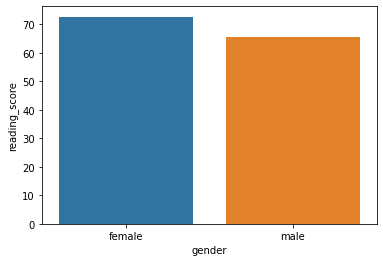

In [112]:
#let us visualize how the gender affects reading_score
sns.barplot(x = 'gender', y = 'reading_score', data = df, ci = None)

<AxesSubplot:xlabel='gender', ylabel='writing_score'>

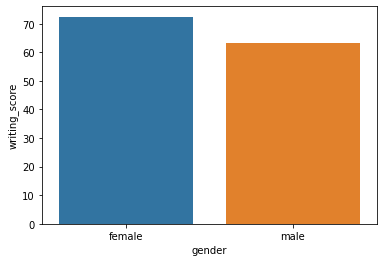

In [114]:
#let us visualize how the gender affects reading_score
sns.barplot(x = 'gender', y = 'writing_score', data = df, ci = None)

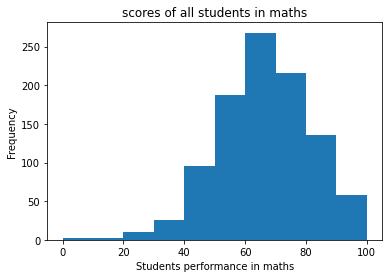

In [26]:
#Visualize the class distribution of the different assesment scores
fig, ax = plt.subplots()

ax.hist(df['math_score'])
ax.set_xlabel('Students performance in maths') 
ax.set_ylabel('Frequency') 
ax.set_title('scores of all students in maths') 

plt.show()

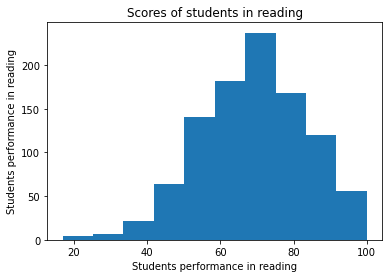

In [34]:
fig, ax= plt.subplots()

ax.hist(df['reading_score'])
ax.set_xlabel('Students performance in reading')
ax.set_ylabel('Students performance in reading')
ax.set_title('Scores of students in reading')

plt.show()

Text(0.5, 1.0, 'Scores of students in writing')

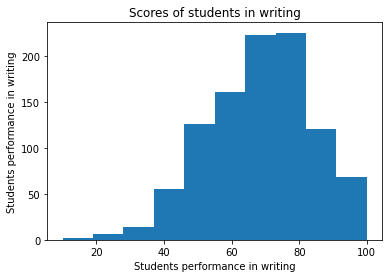

In [35]:
fig, ax= plt.subplots()
ax.hist(df['writing_score'])
ax.set_xlabel('Students performance in writing')
ax.set_ylabel('Students performance in writing')
ax.set_title('Scores of students in writing')

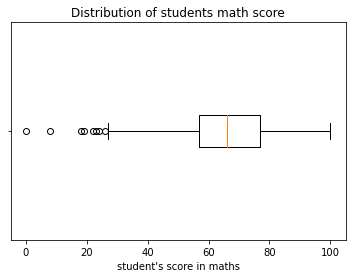

In [133]:
fig, ax = plt.subplots()

ax.boxplot(df['math_score'], vert=False)

ax.set_xlabel("student's score in maths")
ax.set_yticklabels('')
ax.set_title('Distribution of students math score')

plt.show()

In [140]:
#Let us check is there is an outlier in the distribution by using boxplot
df[df['math_score']<20]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
17,female,group B,some high school,free/reduced,none,18,32,28,78,0
59,female,group C,some high school,free/reduced,none,0,17,10,27,0
787,female,group B,some college,standard,none,19,38,32,89,0
980,female,group B,high school,free/reduced,none,8,24,23,55,0


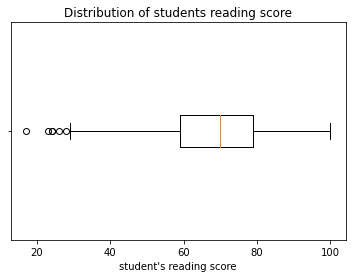

In [142]:
fig, ax = plt.subplots()

ax.boxplot(df['reading_score'], vert=False)

ax.set_xlabel("student's reading score")
ax.set_yticklabels('')
ax.set_title('Distribution of students reading score')

plt.show()

In [146]:
#Lets see the record of students who scored below 40 in their reading skills

df[df['reading_score'] <30]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
59,female,group C,some high school,free/reduced,none,0,17,10,27,0
76,male,group E,some high school,standard,none,30,26,22,78,0
211,male,group C,some college,free/reduced,none,35,28,27,90,0
327,male,group A,some college,free/reduced,none,28,23,19,70,0
596,male,group B,high school,free/reduced,none,30,24,15,69,0
601,female,group C,high school,standard,none,29,29,30,88,0
896,male,group B,high school,free/reduced,none,36,29,27,92,0
980,female,group B,high school,free/reduced,none,8,24,23,55,0


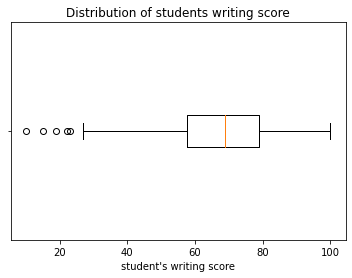

In [147]:
fig, ax = plt.subplots()

ax.boxplot(df['writing_score'], vert=False)

ax.set_xlabel("student's writing score")
ax.set_yticklabels('')
ax.set_title('Distribution of students writing score')

plt.show()

In [150]:
df[df['writing_score'] < 25]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
59,female,group C,some high school,free/reduced,none,0,17,10,27,0
76,male,group E,some high school,standard,none,30,26,22,78,0
327,male,group A,some college,free/reduced,none,28,23,19,70,0
596,male,group B,high school,free/reduced,none,30,24,15,69,0
980,female,group B,high school,free/reduced,none,8,24,23,55,0


##### Student distribution in Math
***There are two main ways to display the distribution of a single quantitative variable Histogram or boxplot***
number of mode (highest point on the graph): `The distribution is unimodal,`
Symmetry/skew :symetric
Outlier: We noticed that there are some students that perform so bad inn math, they score 0 and below 20, although could be slightly seen in the histogram, but the box plot shows it better.It is also seen that their parents are mostly from high school and college background, they did not also complete thie test preparation.

##### Students distribution in Reading 
`The disctribution is unimodl, right skewed` ABout 8 students scored below 30, but no student scored 0, The oulier lies on the students that scored below 30. it is also observed that the majority of those that scored below 30 mostly have parents that have some college and high school degree. And the students never completed their preparation course

##### Students distribution in Writing
`The distribution is bimodal, right skwed` Outlier is observed when the students scored below 25 in their writing score, and it is also seen that most of their parents have college and high school degrees, also these students did not complete their test preparation course.



#### Female students reached and performed beyond the class average than male students

In [ ]:
#find the relationship between students test prep course and overall score

No handles with labels found to put in legend.


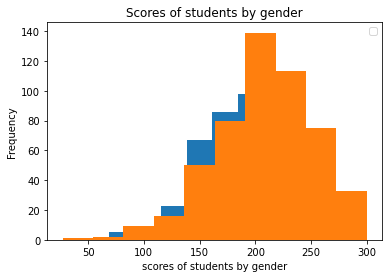

In [125]:

Male_student = df[df['gender'] == 'male']
Female_student = df[df['gender'] == 'female']

fig, ax = plt.subplots()

ax.hist(Male_student['overall_score'])
ax.hist(Female_student['overall_score'])

ax.set_xlabel('scores of students by gender') 
ax.set_ylabel('Frequency') 
ax.set_title('Scores of students by gender') 

ax.legend()

plt.show()

In [189]:
overall_sorted = pd.DataFrame(df.sort_values(by = ['overall_score'], ascending = True))
overall_sorted

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
59,female,group C,some high school,free/reduced,none,0,17,10,27,0
980,female,group B,high school,free/reduced,none,8,24,23,55,0
596,male,group B,high school,free/reduced,none,30,24,15,69,0
327,male,group A,some college,free/reduced,none,28,23,19,70,0
76,male,group E,some high school,standard,none,30,26,22,78,0
...,...,...,...,...,...,...,...,...,...,...
179,female,group D,some high school,standard,completed,97,100,100,297,1
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,1
458,female,group E,bachelor's degree,standard,none,100,100,100,300,1
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,1


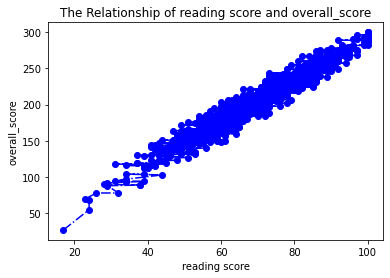

In [190]:
# Task 6 - Plotting

# UNCOMMENT the code lines to complete the Task

fig, ax = plt.subplots()

ax.plot(overall_sorted['reading_score'], overall_sorted['overall_score'], 
    marker = 'o',
    linestyle = 'dashdot',
    color = 'b') 

ax.set_xlabel('reading score') 
ax.set_ylabel('overall_score') 
ax.set_title('The Relationship of reading score and overall_score') 

plt.show()

In [48]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'overall_score', 'Remark'],
      dtype='object')

In [202]:
#Find the joint distribution of students gender and their overall performance 
df_joint = pd.crosstab(df['gender'], columns = df['Remark'])
print(df_joint)

Remark    0    1
gender          
female  218  300
male    256  226


In [84]:
#Check the marginal distribution of students in each course and their overall performance
df_Marginal = pd.crosstab(df['parental_level_of_education'], columns = df['Remark'], margins = True)
print(df_Marginal)

Remark                         0    1   All
parental_level_of_education                
associate's degree            94  128   222
bachelor's degree             45   73   118
high school                  117   79   196
master's degree               20   39    59
some college                 104  122   226
some high school              94   85   179
All                          474  526  1000


<AxesSubplot:xlabel='overall_score', ylabel='parental_level_of_education'>

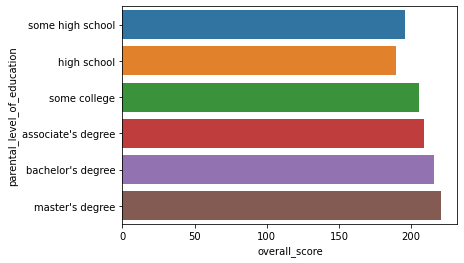

In [191]:
#Visualize how the relationship between the parents occupation and the students overall score/performance

sns.barplot(x = 'overall_score', y = 'parental_level_of_education', data = overall_sorted, ci = None)

In [203]:
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(index=df["Remark"], columns=df["parental_level_of_education"]))

print("g is = :", g)
print("p is = :", p)
print("dof is = :", dof)
print("expctd is = :", expctd)


g is = : 24.58588853806093
p is = : 0.00016747031468451499
dof is = : 5
expctd is = : [[105.228  55.932  92.904  27.966 107.124  84.846]
 [116.772  62.068 103.096  31.034 118.876  94.154]]


#### Performance of students when compared to their parents occupation
Students whose parents have masters degree performed highest,followed by the student whose parents have bachelors degree and then then associate degree, and then followed student whose parents have a high school degree. 
### **`This shows that the parental degree has some level of impact in the performance of their children`** ###

In [97]:
#Check the marginal distribution of students in each course and their overall performance
df_Marginal = pd.crosstab(df['lunch'], columns = df['Remark'], margins = True)
print(df_Marginal)

Remark          0    1   All
lunch                       
free/reduced  221  134   355
standard      253  392   645
All           474  526  1000


<AxesSubplot:xlabel='lunch', ylabel='overall_score'>

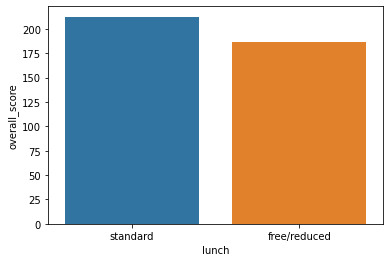

In [204]:
sns.barplot(x = 'lunch', y = 'overall_score',  data = df, ci = None)

In [205]:
g, p, dof, expctd = chi2_contingency(pd.crosstab(index=df["Remark"], columns=df["lunch"]))

print("g is = :", g)
print("p is = :", p)
print("dof is = :", dof)
print("expctd is = :", expctd)

g is = : 47.78459375376041
p is = : 4.757156406823991e-12
dof is = : 1
expctd is = : [[168.27 305.73]
 [186.73 339.27]]


<AxesSubplot:xlabel='gender', ylabel='overall_score'>

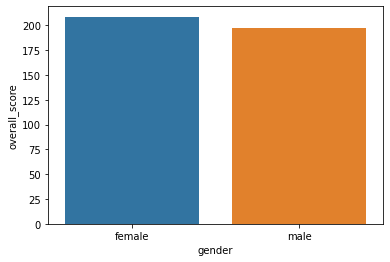

In [159]:
sns.barplot(x = 'gender', y = 'overall_score',  data = df, ci = None)

#### The plot shows the relationship between students who has standard or free lunch and their overall performance, ` students who had standard lunch performed much better than the students with free lunch `

In [111]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'overall_score', 'Remark'],
      dtype='object')

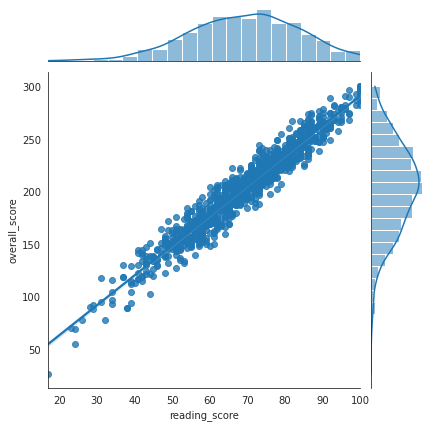

In [207]:
#See the marginal distribution of students performance who completed the test
with sns.axes_style('white'):
    sns.jointplot(x = "reading_score", y = "overall_score", data=df, kind='reg')

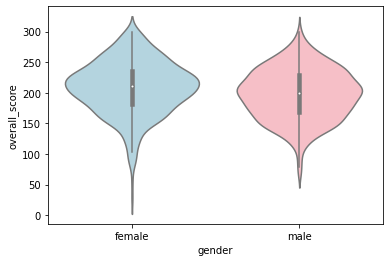

In [195]:
sns.violinplot(x = "gender", y = "overall_score", data=df,
               palette=["lightblue", "lightpink"]);


In [126]:
df_Marginal = pd.crosstab(df['race/ethnicity'], columns = df['Remark'], margins = True)
print(df_Marginal)

Remark            0    1   All
race/ethnicity                
group A          58   31    89
group B         109   81   190
group C         153  166   319
group D         110  152   262
group E          44   96   140
All             474  526  1000


<AxesSubplot:xlabel='race/ethnicity', ylabel='overall_score'>

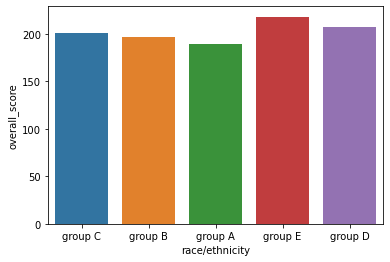

In [196]:
sns.barplot(x = 'race/ethnicity', y = 'overall_score',  data = overall_sorted, ci = None)

In [130]:
df_Marginal = pd.crosstab(df['test_preparation_course'], columns = df['Remark'], margins = True)
print(df_Marginal)

Remark                     0    1   All
test_preparation_course                
completed                116  242   358
none                     358  284   642
All                      474  526  1000


<AxesSubplot:xlabel='test_preparation_course', ylabel='overall_score'>

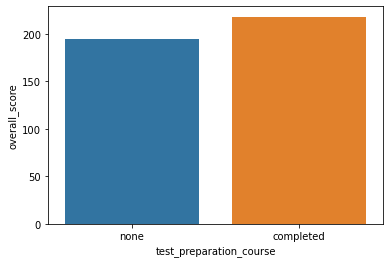

In [201]:
sns.barplot(x = 'test_preparation_course', y = 'overall_score',  data = df, ci = None)

In [ ]:
from scipy import stats
r, p_val = stats.pearsonr(dfs[''], longbones['Time'])

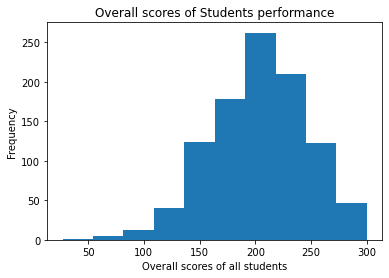

In [182]:
#Visualize the class distribution of the different assesment scores
fig, ax = plt.subplots()

ax.hist(df['overall_score'])
ax.set_xlabel('Overall scores of all students') 
ax.set_ylabel('Frequency') 
ax.set_title('Overall scores of Students performance') 

plt.show()

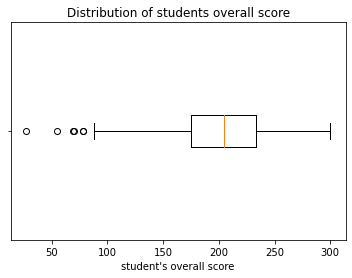

In [183]:
fig, ax = plt.subplots()

ax.boxplot(df['overall_score'], vert=False)

ax.set_xlabel("student's overall score")
ax.set_yticklabels('')
ax.set_title('Distribution of students overall score')

plt.show()

In [180]:
df[df['overall_score']<90]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,Remark
17,female,group B,some high school,free/reduced,none,18,32,28,78,0
59,female,group C,some high school,free/reduced,none,0,17,10,27,0
76,male,group E,some high school,standard,none,30,26,22,78,0
327,male,group A,some college,free/reduced,none,28,23,19,70,0
338,female,group B,some high school,free/reduced,none,24,38,27,89,0
596,male,group B,high school,free/reduced,none,30,24,15,69,0
601,female,group C,high school,standard,none,29,29,30,88,0
787,female,group B,some college,standard,none,19,38,32,89,0
980,female,group B,high school,free/reduced,none,8,24,23,55,0


In [206]:
df.corr().style.background_gradient(cmap="Blues")

,math_score,reading_score,writing_score,overall_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
overall_score,0.918746,0.970331,0.965667,1.000000


In [ ]:
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]